<a href="https://colab.research.google.com/github/AjayKumar-AK/Spammer/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARTIFICIAL NEURAL NETWORK

Importing the necessary libraries.

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

Loading the datasets

In [ ]:
df1 = pd.read_csv("porosity.csv")
df2 = pd.read_csv("vickerHT.csv")
df3 = pd.read_csv("yeildS.csv")
df4 = pd.read_csv("youngsM.csv")
df5 = pd.read_csv("UST.csv")

spliting the inputs and output variables as X and Y respectively

In [ ]:
x1=df1.iloc[:,:-1]#input variables "iloc" fn helps us to locate the dataset...
x2=df2.iloc[:,:-1]#...as [rows[],columns[]]
x3=df3.iloc[:,:-1]
x4=df4.iloc[:,:-1]
x5=df5.iloc[:,:-1]
y1=df1.iloc[:,-1]
y2=df2.iloc[:,-1]
y3=df3.iloc[:,-1]
y4=df4.iloc[:,-1]
y5=df5.iloc[:,-1]

Train test split

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=20)
x2_train,x2_test,y2_train,y2_test=train_test_split(x1,y1,test_size=0.2,random_state=20)
x3_train,x3_test,y3_train,y3_test=train_test_split(x1,y1,test_size=0.2,random_state=20)
x4_train,x4_test,y4_train,y4_test=train_test_split(x1,y1,test_size=0.2,random_state=20)
x5_train,x5_test,y5_train,y5_test=train_test_split(x1,y1,test_size=0.2,random_state=20)

SCALING THE DATA TO NEUTRALIZE THE WEIGHTAGE OF THE DATASET VALUES OTHERWISE THE MODEL MAY FAIL.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x1_train)
scaler.fit(x2_train)
scaler.fit(x3_train)
scaler.fit(x4_train)
scaler.fit(x5_train)
x1_train_scaled=scaler.transform(x1_train)
x2_train_scaled=scaler.transform(x2_train)
x3_train_scaled=scaler.transform(x3_train)
x4_train_scaled=scaler.transform(x4_train)
x5_train_scaled=scaler.transform(x5_train)
x1_test_scaled=scaler.transform(x1_test)
x2_test_scaled=scaler.transform(x2_test)
x3_test_scaled=scaler.transform(x3_test)
x4_test_scaled=scaler.transform(x4_test)
x5_test_scaled=scaler.transform(x5_test)

DEFINING THE MODEL (ANN)
for Dense layer
  Input shape:    
  The most common situation would be
  a 2D input with shape (batch_size, input_dim).
  ______________________________________
  Output shape:  
   for a 2D input with shape (batch_size, input_dim),
   
  the output would have shape (batch_size, units).

In [ ]:
model = Sequential()
model.add(Dense(140,input_dim=5,activation='relu'))
model.add(Dense(64,activation='relu'))
#for output
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer= 'adam',metrics=['mae'])#mean absolute error
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 140)               840       
                                                                 
 dense_19 (Dense)            (None, 64)                9024      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9929 (38.79 KB)
Trainable params: 9929 (38.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


fitting the values in the model to train the model using scaled training data set.

explanations :

epochs are hyperparameters refering to one complete pass through the entire training dataset during the training phase.

During each epoch, the model iteratively adjusts its parameters (weights and biases) using an optimization algorithm (such as gradient descent or adam in this example) in order to minimize the difference between predicted outputs and actual targets.

In [ ]:
history = model.fit(x1_train_scaled,y1_train,validation_split=0.3,epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 206ms/step - loss: 12.9746 - mae: 2.1732 - val_loss: 21.3504 - val_mae: 2.4043
Epoch 2/200
2/2 [==============================] - 0s 36ms/step - loss: 12.3547 - mae: 2.0333 - val_loss: 20.8673 - val_mae: 2.3138
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 11.8392 - mae: 1.9208 - val_loss: 20.4311 - val_mae: 2.2496
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 11.4441 - mae: 1.8431 - val_loss: 20.0293 - val_mae: 2.2029
Epoch 5/200
2/2 [==============================] - 0s 57ms/step - loss: 11.0748 - mae: 1.7933 - val_loss: 19.6839 - val_mae: 2.1886
Epoch 6/200
2/2 [==============================] - 0s 53ms/step - loss: 10.7554 - mae: 1.7547 - val_loss: 19.3776 - val_mae: 2.1814
Epoch 7/200
2/2 [==============================] - 0s 64ms/step - loss: 10.4772 - mae: 1.7345 - val_loss: 19.0934 - val_mae: 2.1740
Epoch 8/200
2/2 [==============================] - 0s 52ms/step - loss: 10.

In [ ]:
out_vickerHT = model.fit(x2_train_scaled,y2_train,validation_split=0.2,epochs=105)

In [ ]:
out_yeildS = model.fit(x3_train_scaled,y3_train,validation_split=0.2,epochs=105)

In [ ]:
out_youngsM = model.fit(x4_train_scaled,y4_train,validation_split=0.2,epochs=105)

In [ ]:
out_UST = model.fit(x5_train_scaled,y5_train,validation_split=0.2,epochs=105)

PLOTING THE GRAPH

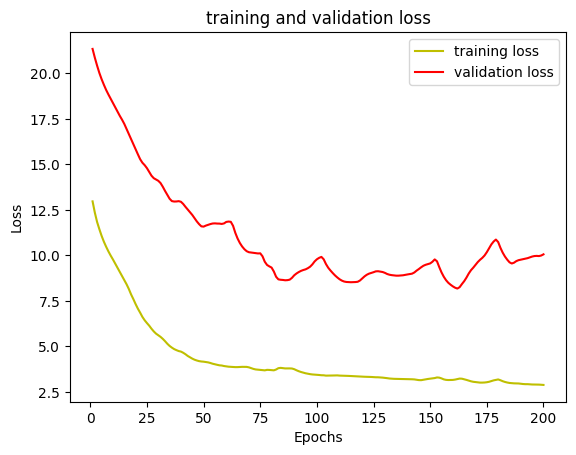

In [ ]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

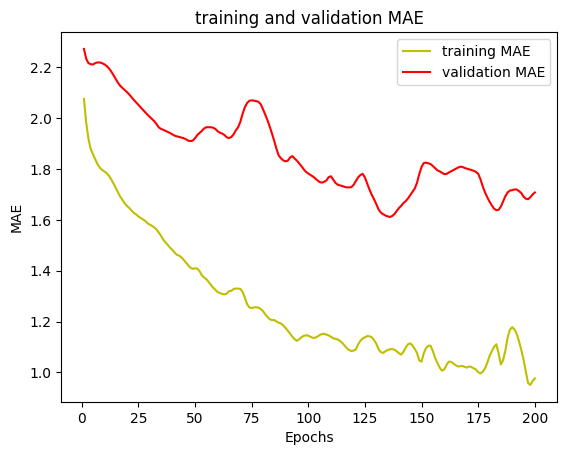

In [ ]:
from matplotlib import pyplot as plt

mae = history.history['mae']
val_mae= history.history['val_mae']
epochs=range(1,len(loss)+1)
plt.plot(epochs,mae,'y',label='training MAE')
plt.plot(epochs,val_mae,'r',label='validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('training and validation MAE')
plt.legend()
plt.show()